In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from matplotlib.colors import LogNorm

In [16]:
con = sqlite3.connect("baseline_w_streaks_scale5.sqlite")
visits = pd.read_sql("select * from observations;", con)
con.close()

scale = 5

In [3]:
night_bins = np.arange(visits["night"].min(), visits["night"].max()+4, 3) - 0.5
alt_bins = np.arange(-90, -10, 3)

In [4]:
visits.columns

Index(['index', 'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'band', 'filter', 'rotSkyPos',
       'rotSkyPos_desired', 'numExposures', 'airmass', 'seeingFwhm500',
       'seeingFwhmEff', 'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime',
       'visitTime', 'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth',
       'paraAngle', 'pseudoParaAngle', 'cloud', 'moonAlt', 'sunAlt',
       'scheduler_note', 'target_name', 'target_id', 'observationStartLST',
       'rotTelPos', 'rotTelPos_backup', 'moonAz', 'sunAz', 'sunRA', 'sunDec',
       'moonRA', 'moonDec', 'moonDistance', 'solarElong', 'moonPhase',
       'cummTelAz', 'observation_reason', 'science_program',
       'cloud_extinction', 'streak_lengths', 'n_streaks'],
      dtype='str')

In [17]:
image = np.zeros(( alt_bins.size,night_bins.size)) + np.nan

# The ugliest loop ever, there must be a better way
for i in np.arange(night_bins.size-1):
    for j in np.arange(alt_bins.size-1):
        good = np.where((visits['night'] > night_bins[i]) & 
                       (visits['night'] < night_bins[i+1]) &
                       (visits['sunAlt'] > alt_bins[j]) &
                       (visits['sunAlt'] < alt_bins[j+1]) )[0]
        if np.size(good) > 0:
            image[j,i] = np.mean(visits["n_streaks"].values[good])
image = image * scale

Text(0.5, 1.0, 'Streaked Visits From 10^6 Constellation')

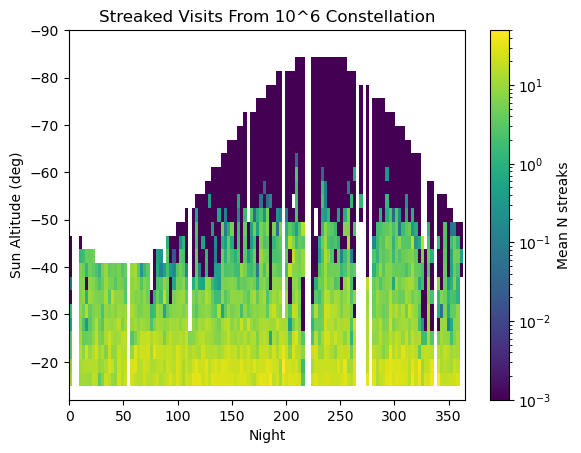

In [23]:
fig, ax = plt.subplots()


ack = ax.imshow(image,
                extent=[night_bins.min(), night_bins.max(), alt_bins.max(), alt_bins.min()],
               aspect='auto')


ack = ax.imshow(image,
                extent=[night_bins.min(), night_bins.max(), alt_bins.max(), alt_bins.min()],
               aspect='auto', norm=LogNorm(vmin=0.001, vmax=50))
cb = plt.colorbar(ack)
cb.set_label('Mean N streaks')
ax.set_xlabel('Night')
ax.set_ylabel('Sun Altitude (deg)')
ax.set_title("Streaked Visits From 10^6 Constellation")

In [21]:
image2 = np.zeros(( alt_bins.size,night_bins.size)) + np.nan

# The ugliest loop ever, there must be a better way
for i in np.arange(night_bins.size-1):
    for j in np.arange(alt_bins.size-1):
        good = np.where((visits['night'] > night_bins[i]) & 
                       (visits['night'] < night_bins[i+1]) &
                       (visits['sunAlt'] > alt_bins[j]) &
                       (visits['sunAlt'] < alt_bins[j+1]) )[0]
        if np.size(good) > 0:
            image2[j,i] = np.mean(visits["streak_lengths"].values[good])

image2 = image2 * scale

Text(0.5, 1.0, 'Streaked Visits From 10^6 Constellation')

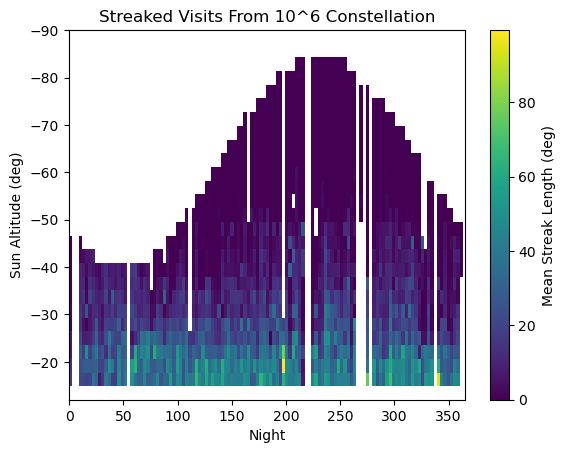

In [24]:
fig, ax = plt.subplots()


ack = ax.imshow(image,
                extent=[night_bins.min(), night_bins.max(), alt_bins.max(), alt_bins.min()],
               aspect='auto')


ack = ax.imshow(image2,
                extent=[night_bins.min(), night_bins.max(), alt_bins.max(), alt_bins.min()],
               aspect='auto')
cb = plt.colorbar(ack)
cb.set_label('Mean Streak Length (deg)')
ax.set_xlabel('Night')
ax.set_ylabel('Sun Altitude (deg)')
ax.set_title("Streaked Visits From 10^6 Constellation")